In [256]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import cv2
import imghdr
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import os
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from keras import Sequential

In [189]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [190]:
# with zipfile.ZipFile(r"/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/PROJECTS/emotions.zip", 'r') as zipped_folder:
# 	zipped_folder.extractall(r"/mnt/c/Users/Subham Pathak/Desktop/AI/DEEP_LEARNING/PROJECTS")

In [191]:
data_directory = 'data'
os.listdir(data_directory)

['happy', 'sad']

In [192]:
os.listdir(os.path.join(data_directory, 'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [193]:
img_ext = ['jpg', 'png', 'webp', 'jpeg', 'bmp']
img_ext

['jpg', 'png', 'webp', 'jpeg', 'bmp']

In [194]:
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)

        try:
            img = cv2.imread(image_path)
            if img is None:
                print(f"Unreadable image: {image_path}")
                os.remove(image_path)

            else:
                tip = imghdr.what(image_path)

                if tip not in img_ext:
                    print(f"Invalid image format ({tip}): {image_path}")
                    os.remove(image_path)

        except Exception as e:
            print(f"Issue with image {image_path}: {e}")
            os.remove(image_path)
        


In [214]:
data = keras.utils.image_dataset_from_directory('data',
                                                batch_size = 16,
                                                label_mode = 'int',
                                                labels = 'inferred',
                                                image_size = (128,128),
                                                )

Found 171 files belonging to 2 classes.


In [215]:
print((data.class_names))


['happy', 'sad']


In [216]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x77616354f2e0>)

In [217]:
batch = next(data_iterator)
print(batch[1])


[0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0]


In [218]:
batch = next(data_iterator)
print(batch[1])

[0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.5273438..250.3681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.67578].


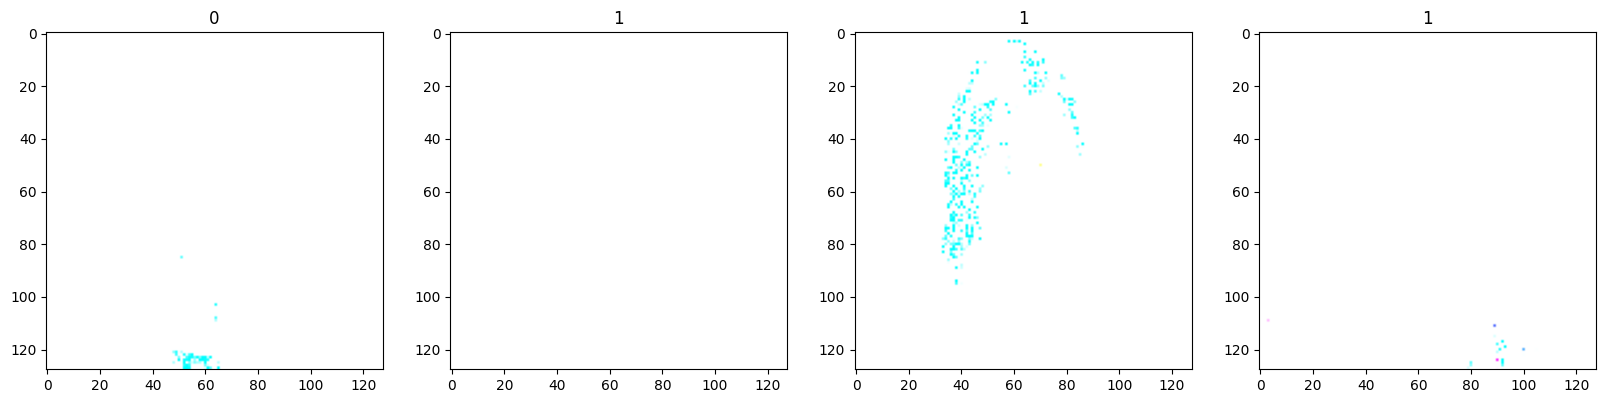

In [219]:
fig, ax = plt.subplots(figsize = (20,20), ncols=4)
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [220]:
data = data.map(lambda x,y: (x/255,y))

In [221]:
scaled_iterator  = data.as_numpy_iterator()

In [222]:
batch2 = next(scaled_iterator)
batch2[0].min()

np.float32(0.0)

In [223]:
train_size = int(len(data)*0.6)+1
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.15)+1

In [224]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [232]:
model = Sequential()
model.add(Input(shape=(128,128,3)))

model.add(Conv2D(16, kernel_size=(3,3), strides=2,  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), strides=2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), strides=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [233]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)              │ (None, 63, 63, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 63, 63, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 15, 15, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 3, 3, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 60)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,049 (43.16 KB)

 Trainable params: 10,921 (42.66 KB)

 Non-trainable params: 128 (512.00 B)

In [234]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam' )

In [235]:
dir = 'saves'

In [236]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=dir)

In [237]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/10


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.5625 - loss: 0.6783 - val_accuracy: 0.6562 - val_loss: 0.6801
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.6875 - loss: 0.6204 - val_accuracy: 0.5938 - val_loss: 0.6809
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.8036 - loss: 0.4858 - val_accuracy: 0.6562 - val_loss: 0.6643
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.7857 - loss: 0.4606 - val_accuracy: 0.5625 - val_loss: 0.6815
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.8304 - loss: 0.3796 - val_accuracy: 0.6562 - val_loss: 0.6801
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.8839 - loss: 0.3415 - val_accuracy: 0.7500 - val_loss: 0.6813
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 282ms/step - accuracy: 0.9196 - loss: 0.2754 - val_accuracy: 0.6875 - val_loss: 0.6820
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.9286 - loss: 0.2551 - val_accuracy: 0.5938 - val_loss: 0.6819
Epo

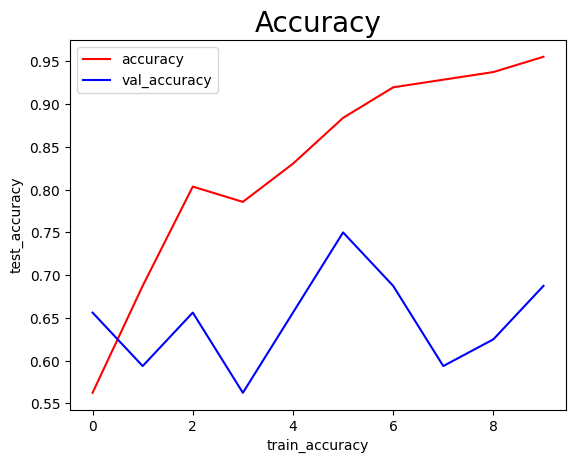

In [255]:
fig = plt.Figure()

plt.plot(history.history['accuracy'],color = 'red', label = 'accuracy')
plt.xlabel('train_accuracy')

plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.ylabel('test_accuracy')

plt.title('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

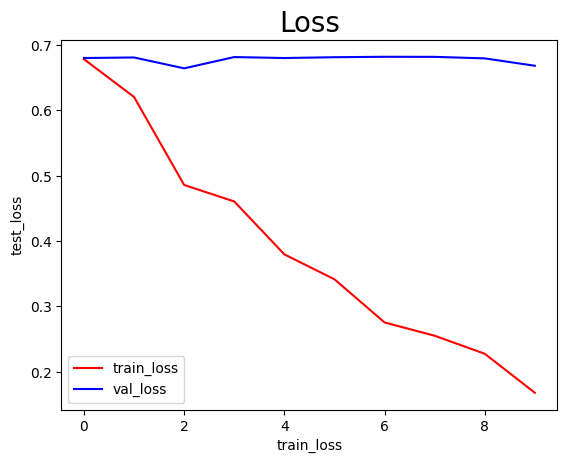

In [254]:
fig = plt.Figure()

plt.plot(history.history['loss'],color = 'red', label = 'train_loss')
plt.xlabel('train_loss')

plt.plot(history.history['val_loss'], color = 'blue', label = 'val_loss')
plt.ylabel('test_loss')

plt.title('Loss', fontsize = 20)
plt.legend(loc = 'lower left')
plt.show()

In [257]:
pre = Precision()
acc = BinaryAccuracy()
rec = Recall()

In [258]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_hat = model.predict(x)
    pre.update_state(y, y_hat)
    acc.update_state(y, y_hat)
    rec.update_state(y, y_hat)
    
    
print(f"Precision is: {pre.result().numpy()}, Recall is: {rec.result().numpy()}, Accuracy is: {acc.result().numpy()}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision is: 0.529411792755127, Recall is: 1.0, Accuracy is: 0.7037037014961243.
